# Ejercicios

## Caminata Aleatoria

Considere una particula en 2 dimensiones, centrada en el origen, la cual se mueve en cada iteración en una dirección aleatoria a una distancia fija, es decir, se mueve en un radio $R$, particularmente pensemos en $R=1$. Por nuestras clases de cálculo, sabemos que podemos hacer una cambio de coordenadas cartesianas a polares de la siguiente manera:

$$X =R \cos(\theta)$$
$$Y = R \sin(\theta)$$

Donde:
$$R\in [0, \infty)\qquad \theta\in(0,2\pi)$$

Claramente:
$$\bar{x} = (X,Y)$$
$$d(\bar{x},\bar{0})=||(X,Y)||_2 = \sqrt{X^2 + Y^2} = \sqrt{R^2 \cos^2(\theta) + R^2 \sin^2(\theta)} = \sqrt{R^2 [\cos^2(\theta) + \sin^2(\theta)]} =  \sqrt{R^2} = R$$

Ahora, hagamos que el cambio en la posición de la partícula en la iteración $i$ se distribuya uniformemente sobre la circunferencia de radio $R$, de la siguiente manera:
$$\theta_i \sim Unif(0,2\pi)$$

$$X_i =R \cos(\theta_i)$$
$$Y_i = R \sin(\theta_i)$$

Y de esta manera, la posición de la partícula en la iteración $n$, está dada por:
$$\left(\sum_{i=1}^{n}X_i, \sum_{i=1}^{n}Y_i\right)$$

Y de esta manera, la distancia al cuadrado de la partícula al tiempo $n$ con respecto al origen está dada por:
$$D^2 = \left(\sum_{i=1}^{n}X_i\right)^2 + \left(\sum_{i=1}^{n}Y_i\right)^2$$

Cuál es el valor esperado de $D^2$?, es decir, en promedio, cuánto esperamos que se aleje la partícula de su posición inicial al tiempo $n$?

Así buscamos:
$$\mathbb{E}[D^2]$$

Primero, creemos los cambios en la posición de la partícula:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px
import itertools

In [2]:
class RandomWalk:
    
    def __init__(self):
        self.iteraciones = None
        self.radio = None
        self.summary = None
        self.distancia = None
        
    def compute(self, n, R = 1):
        theta = np.random.uniform(0,2*np.pi,n+1)
        self.summary =pd.DataFrame({'theta':theta})
        self.summary['dX'] = R*self.summary['theta'].apply(np.cos)
        self.summary['dY'] = R*self.summary['theta'].apply(np.sin)
        self.summary['dX'][0] = 0
        self.summary['dY'][0] = 0
        self.summary['X'] = self.summary['dX'].cumsum()
        self.summary['Y'] = self.summary['dY'].cumsum()
        X = self.summary['dX'].sum()
        Y = self.summary['dY'].sum()
        self.summary['tiempo'] = list(range(n+1)) # Auxiliar para el plot
        self.distancia = X**2 + Y**2
        self.radio = R
        self.iteraciones = n
        return
    
    def plot(self):
        sns.set_style("darkgrid")
        plt.figure(figsize = (12,12))
        ax = sns.scatterplot(x = "X", y = "Y", hue= 'tiempo',palette='plasma_r',data = self.summary)
        ax.set_title("Caminata Aleatoria (n = "+str(self.iteraciones)+", R = "+str(self.radio)+")",\
                     fontsize = '25')
        plt.show()
        return
    def __str__(self):
        string = "Radio: {0}\nIteraciones: {1}\nDistancia: {2}".format(self.radio, self.iteraciones\
                                                                       ,self.distancia)
        return string

### Ejemplo de Camintas Aleatorias

Radio: 1
Iteraciones: 2500
Distancia: 6609.418780885457


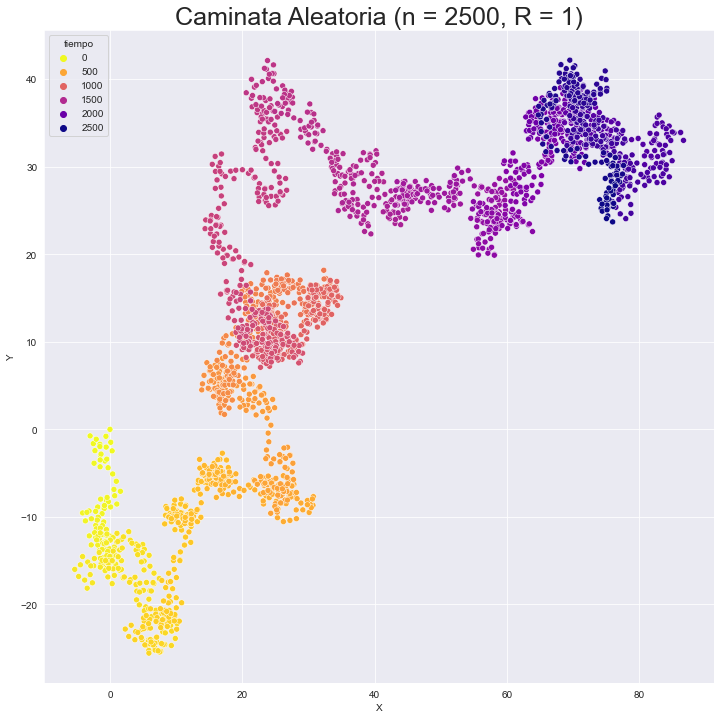

In [50]:
rw = RandomWalk()
rw.compute(2500)
print(rw)
rw.plot()

In [44]:
n = 50
R = 1
D2 = []
m = 2500
for _ in range(m):
    rw = RandomWalk()
    rw.compute(n,R)
    D2.append(rw.distancia)

In [45]:
print("La distancia cuadrada al origen promedio es D^2: {0}".format(np.mean(D2)))

La distancia cuadrada al origen promedio es D^2: 50.379726388899385


De esta manera, podemos observar que si una partícula la dejamos moverse durante una cantidad de $n$ instantes (iteraciones, tiempos), sobre un radio $R$, entonces, la distancia de la partícula en su posición final con respecto al origen es de:
$$\mathbb{E}[D^2] = nR^2$$

Particularmente si $R=1$, entonces:
$$\mathbb{E}[D^2] = n$$

## Rachas

Suponga que tiene una secuencia de $n$ 1's y $m$ 0's, que es aleatoriamente permutado, donde cada permutación goza de la misma probabilidad.  Cada subcadena de más de un 1 consecutivos contenida en la cadena original se dice que es una racha. Por ejemplo, $n=6, m = 4$ con la cadena:
$$'1,1,1,0,1,1,0,0,1,0'$$ 
Tiene 3 rachas de 1's. Nos interesa calcular el número promedio de rachas.

In [6]:
class Rachas:
    
    def __init__(self):
        self.n = None
        self.m = None
        self.racha_1 = 0
        self.racha_0 = 0
        self.cadena = None
        self.permutaciones = None
        
    def compute(self, n, m):
        self.cadena = [1]*n +[0]*m
        #self.permutaciones = itertools.permutations(self.cadena)
        #self.permutaciones = list(set(self.permutaciones))
        #self.cadena = self.permutaciones[np.random.randint(len(self.permutaciones),size = 1)[0]]
        self.cadena = np.random.permutation(self.cadena).tolist()
        counts = [0,0]
        for i in self.cadena:
            if i == 0:
                counts[0] +=1
                counts[1] = 0
            else:
                counts[0] =0
                counts[1]+=1
            if counts[0] == 1:
                self.racha_0+=1
            elif counts[1] == 1:
                self.racha_1 +=1
        self.n = n
        self.m = m
        return
    
    def __str__(self):
        string = "Cadena: {0}\nn: {1}\nm: {2}\nRachas de 0: {3}\nRachas de 1: {4}".format(self.cadena\
                                                                                         ,self.n\
                                                                                         , self.m\
                                                                                         , self.racha_0\
                                                                                         ,self.racha_1)
        return string

In [7]:
r = Rachas()
r.compute(2,4)
print(r)

Cadena: [1, 0, 0, 1, 0, 0]
n: 2
m: 4
Rachas de 0: 2
Rachas de 1: 2


Veamos, en promedio, cuantas rachas hay:

In [8]:
k = 10000
n = 7
m = 3
c_0 = 0
c_1 = 0
teorico_0 = (m + (n*m))/(n+m)
teorico_1 = (n + (n*m))/(n+m)
for _ in range(k):
    r = Rachas()
    r.compute(n,m)
    c_0 += r.racha_0
    c_1 += r.racha_1

In [9]:
print("Promedio de rachas en 0 (estimado): {0}\n\
Promedio de rachas 0 (teórico): {1}\n\
Promedio de rachas en 1 (estimado): {2}\n\
Promedio de rachas en 1 (teórico): {3}\n\
".format(c_0/k,teorico_0,c_1/k,teorico_1))

Promedio de rachas en 0 (estimado): 2.4015
Promedio de rachas 0 (teórico): 2.4
Promedio de rachas en 1 (estimado): 2.7974
Promedio de rachas en 1 (teórico): 2.8

